In [ ]:
# https://github.com/hibartaufik/Data-Analysis-Covid-in-Indonesia

# Assessment

# Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data Exploration

In [5]:
# Load CSV data into dataframe
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')

# Display first 5 rows of data
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [6]:
# Data description for the dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [7]:
# Checking the number of columns and rows
data.shape

(21759, 38)

In [8]:
# Find null values in each column
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21759
Province                         642
Country                            0
Continent                          0
Island                           642
Time Zone                        642
Special Status                 18636
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

In [9]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,0.0,21759.000000,...,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,20572.000000,19292.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,NaN,24.160256,...,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192,1.395671,1.074145
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,NaN,68.708265,...,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595,3.080207,1.578502
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000,0.650000,0.660000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000,0.990000,1.000000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,NaN,18.000000,...,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000,1.330000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


In [10]:
# Change the date data type to a datetime data type to avoid errors in sorting time-series for visualization
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y")

In [11]:
# Filter into national and regional datasets

national = data[data['Location'] == "Indonesia"]
island = data[data['Location'] != "Indonesia"] 

# Remove empty columns
national = national.drop(['City or Regency', 'Total Regencies', 'Total Cities', 'Total Districts', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'Population', 'Population Density', 'Longitude', 'Latitude'], axis=1)


In [12]:
# Correlation matrix for national dataframes

national.corr()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.877238,0.867125,0.286069,0.317213,0.226173,0.250185,0.944753,1.000000,0.317213,0.877230,0.226174,0.226178,0.007654,-0.049179
New Deaths,0.877238,1.000000,0.967550,-0.151248,0.424636,0.349536,0.360333,0.942527,0.877237,0.424636,0.999998,0.349537,0.349537,-0.011879,-0.023803
New Recovered,0.867125,0.967550,1.000000,-0.229134,0.442011,0.364635,0.377656,0.950023,0.867126,0.442011,0.967548,0.364636,0.364636,-0.030534,-0.053814
New Active Cases,0.286069,-0.151248,-0.229134,1.000000,-0.230897,-0.260211,-0.238060,0.018326,0.286067,-0.230897,-0.151260,-0.260211,-0.260202,0.072655,0.005282
Total Cases,0.317213,0.424636,0.442011,-0.230897,1.000000,0.993017,0.997234,0.378309,0.317212,1.000000,0.424664,0.993017,0.993017,-0.056326,-0.027827
Total Deaths,0.226173,0.349536,0.364635,-0.260211,0.993017,1.000000,0.997421,0.284733,0.226172,0.993017,0.349564,1.000000,1.000000,-0.055148,-0.023744
Total Recovered,0.250185,0.360333,0.377656,-0.238060,0.997234,0.997421,1.000000,0.308489,0.250184,0.997234,0.360361,0.997421,0.997421,-0.054444,-0.023459
Total Active Cases,0.944753,0.942527,0.950023,0.018326,0.378309,0.284733,0.308489,1.000000,0.944753,0.378309,0.942539,0.284733,0.284735,-0.042006,-0.063154
New Cases per Million,1.000000,0.877237,0.867126,0.286067,0.317212,0.226172,0.250184,0.944753,1.000000,0.317212,0.877230,0.226173,0.226177,0.007655,-0.049185
Total Cases per Million,0.317213,0.424636,0.442011,-0.230897,1.000000,0.993017,0.997234,0.378309,0.317212,1.000000,0.424664,0.993017,0.993017,-0.056326,-0.027827


In [13]:
pd.set_option('display.max_columns', None)
island.corr()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.661132,0.803703,0.189344,0.466974,0.336677,0.417704,0.858331,NaN,0.070166,0.284973,0.185919,0.231310,0.274034,-0.088341,0.338824,0.337836,-0.114685,-0.191754,0.620638,0.259703,0.392655,0.201056,0.201056,-0.011861,0.047933
New Deaths,0.661132,1.000000,0.658415,-0.115977,0.393828,0.476010,0.350472,0.658097,NaN,0.208817,0.279835,0.273907,0.283430,0.307409,-0.059888,0.376245,0.132460,-0.086937,-0.185157,0.304821,0.151280,0.498153,0.211469,0.211469,-0.022769,0.138492
New Recovered,0.803703,0.658415,1.000000,-0.431502,0.491649,0.360778,0.449934,0.769998,NaN,0.057977,0.258467,0.164778,0.207630,0.251280,-0.081597,0.305503,0.314085,-0.105220,-0.173841,0.488799,0.287912,0.409738,0.234902,0.234903,-0.023650,0.102278
New Active Cases,0.189344,-0.115977,-0.431502,1.000000,-0.106026,-0.098476,-0.111253,0.026592,NaN,0.000756,0.000391,0.000976,0.000457,0.001131,0.000601,0.000843,0.000303,0.000189,-0.000643,0.140260,-0.078376,-0.093424,-0.085990,-0.085990,0.021595,-0.101219
Total Cases,0.466974,0.393828,0.491649,-0.106026,1.000000,0.788237,0.997498,0.481084,NaN,0.083828,0.383000,0.237158,0.308435,0.374164,-0.118014,0.444591,0.493900,-0.147070,-0.256984,0.225105,0.633565,0.183861,0.559300,0.559298,-0.034088,0.031038
Total Deaths,0.336677,0.476010,0.360778,-0.098476,0.788237,1.000000,0.774477,0.355493,NaN,0.292094,0.416766,0.386521,0.412616,0.450514,-0.089729,0.537450,0.238326,-0.121060,-0.271506,0.101664,0.372691,0.161137,0.513531,0.513530,-0.033366,0.027719
Total Recovered,0.417704,0.350472,0.449934,-0.111253,0.997498,0.774477,1.000000,0.421021,NaN,0.064556,0.367310,0.214478,0.290600,0.353055,-0.120400,0.420483,0.497713,-0.144895,-0.246714,0.198366,0.643291,0.160184,0.562001,0.561999,-0.032623,0.026808
Total Active Cases,0.858331,0.658097,0.769998,0.026592,0.481084,0.355493,0.421021,1.000000,NaN,0.180967,0.319765,0.305912,0.289178,0.336902,-0.023783,0.423212,0.242577,-0.091624,-0.215606,0.480313,0.217916,0.379761,0.182628,0.182629,-0.030996,0.065650
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.070166,0.208817,0.057977,0.000756,0.083828,0.292094,0.064556,0.180967,NaN,1.000000,0.476885,0.914059,0.719639,0.900921,0.416835,0.590269,-0.245343,0.081715,-0.194997,-0.180535,-0.249541,-0.094949,-0.148305,-0.148305,-0.004177,0.033383


<AxesSubplot:xlabel='Total Cases'>

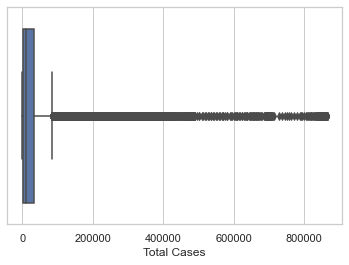

In [11]:
sns.set(style='whitegrid')
sns.boxplot(x='Total Cases', data=island)

<AxesSubplot:ylabel='Frequency'>

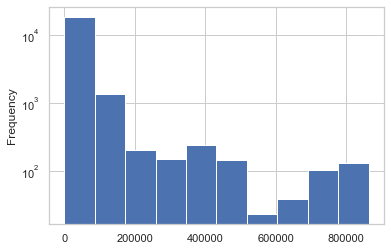

In [12]:
island['Total Cases'].plot(kind='hist', logy=True)

In [13]:
island.shape

(21117, 38)

In [14]:
national.shape

(642, 27)

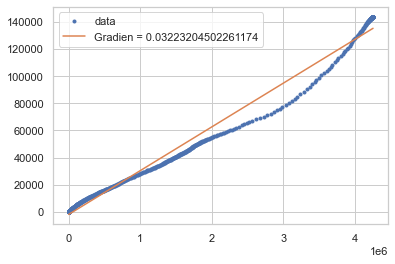

In [15]:
x = national['Total Cases']
y = national['Total Deaths']
koefisien =np.polyfit(x,y,1)
fungsi = np.poly1d(koefisien)
plt.plot(x,y,'.',label = 'data')
plt.plot(x,fungsi(x),'-',label = 'Gradien = {}'.format(koefisien[0]))
plt.legend(loc='upper left')
plt.show()

# So it can be concluded that the ratio of recovered patients to total cases is 84%

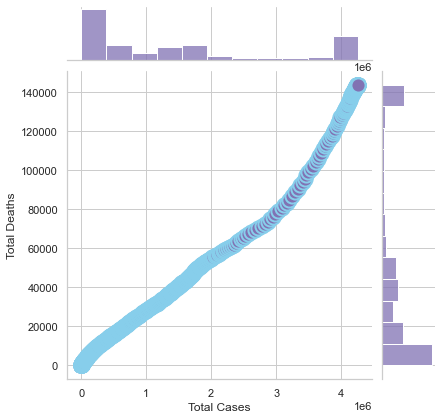

In [16]:
sns.jointplot(x=national["Total Cases"], y=national["Total Deaths"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

plt.show()

In [17]:
island.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21117
Province                           0
Country                            0
Continent                          0
Island                             0
Time Zone                          0
Special Status                 17994
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

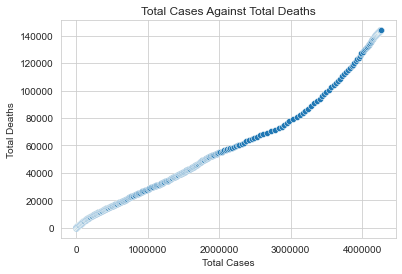

In [14]:
sns.set_style(style='whitegrid')

sns.scatterplot(
    data=national, 
    x='Total Cases', 
    y='Total Deaths', 
    palette='Paired_r',
    )

plt.title('Total Cases Against Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

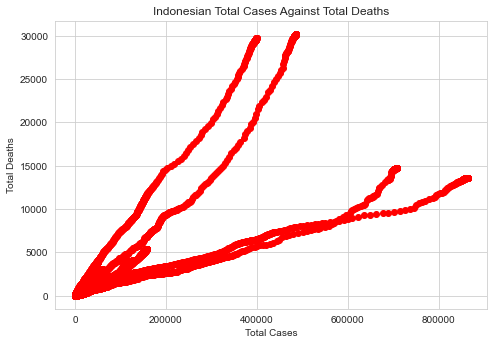

In [15]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(island['Total Cases'], island['Total Deaths'], color='r')
ax.set_xlabel('Total Cases')
ax.set_ylabel('Total Deaths')
ax.set_title('Indonesian Total Cases Against Total Deaths')
ax.ticklabel_format(style='plain')
plt.show()

In [16]:
x = island['Total ']
y = island['Total Cases']
koefisien =np.polyfit(x,y,1)
fungsi = np.poly1d(koefisien)
plt.plot(x,y,'.',label = 'data')
plt.plot(x,fungsi(x),'-',label = 'Gradien = {}'.format(koefisien[0]))
plt.legend(loc='upper left')

plt.show()

# So it can be concluded that the ratio of recovered patients to total cases is 84%

KeyError: 'Total '

# Decision Tree
https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

In [17]:
#https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

island['Spread'] = np.where(island['Growth Factor of New Cases']>= 1, 1, 0)
ab = island.select_dtypes([np.number])
ac=ab
ab = ab.drop(["Spread", "Total Deaths per 100rb", "Growth Factor of New Cases"], axis=1)
ab[np.isnan(ab)] = 0
ac.tail()

C:\Users\Neil\AppData\Local\Temp/ipykernel_9752/1672169552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  island['Spread'] = np.where(island['Growth Factor of New Cases']>= 1, 1, 0)


,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths,Spread
21753,3,0,0,3,20160,527,19583,50,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,1.14,7649.52,0.0,199.97,20.00,NaN,1.0,0
21754,2,0,0,2,34715,1056,33566,93,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.0,399.71,39.97,NaN,1.0,0
21755,4,0,0,4,89849,2152,87605,92,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.0,389.91,38.99,4.0,1.0,1
21756,4,0,0,4,59937,3071,56830,36,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.0,373.71,37.37,4.0,1.0,1
21757,4,0,1,3,106045,2889,103061,95,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.0,194.22,19.42,1.0,1.0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(ab, ac['Spread'], random_state=0)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(max_depth = 3)

In [21]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(334.8, 570.7800000000001, 'X[3] <= 11.5\ngini = 0.499\nsamples = 15837\nvalue = [8303, 7534]'),
 Text(167.4, 407.70000000000005, 'X[20] <= 4.24\ngini = 0.482\nsamples = 10661\nvalue = [6349, 4312]'),
 Text(83.7, 244.62, 'X[0] <= 0.5\ngini = 0.472\nsamples = 547\nvalue = [209, 338]'),
 Text(41.85, 81.53999999999996, 'gini = 0.363\nsamples = 390\nvalue = [93, 297]'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.386\nsamples = 157\nvalue = [116, 41]'),
 Text(251.10000000000002, 244.62, 'X[0] <= 5.5\ngini = 0.477\nsamples = 10114\nvalue = [6140, 3974]'),
 Text(209.25, 81.53999999999996, 'gini = 0.432\nsamples = 3210\nvalue = [2197, 1013]'),
 Text(292.95, 81.53999999999996, 'gini = 0.49\nsamples = 6904\nvalue = [3943, 2961]'),
 Text(502.20000000000005, 407.70000000000005, 'X[7] <= 1525.5\ngini = 0.47\nsamples = 5176\nvalue = [1954, 3222]'),
 Text(418.5, 244.62, 'X[0] <= 26.5\ngini = 0.446\nsamples = 2364\nvalue = [793, 1571]'),
 Text(376.65000000000003, 81.53999999999996, 'g

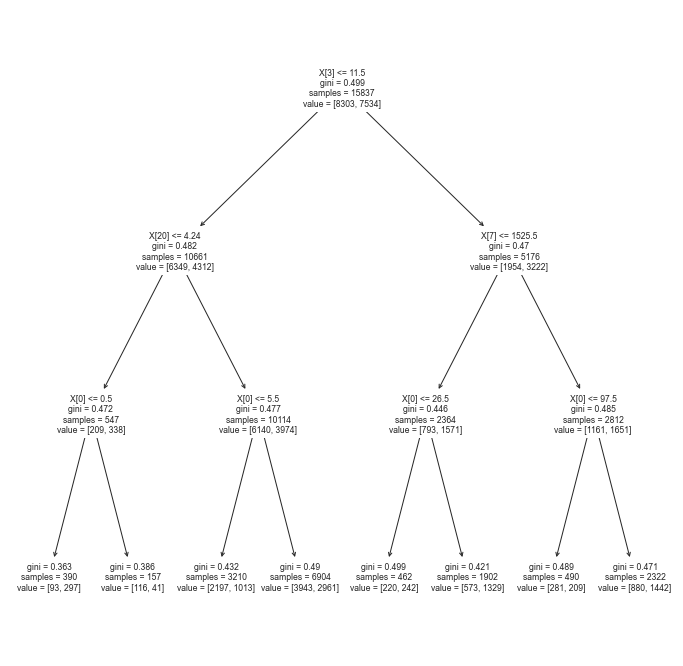

In [133]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

tree.plot_tree(clf)

In [128]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [129]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.6365530303030303


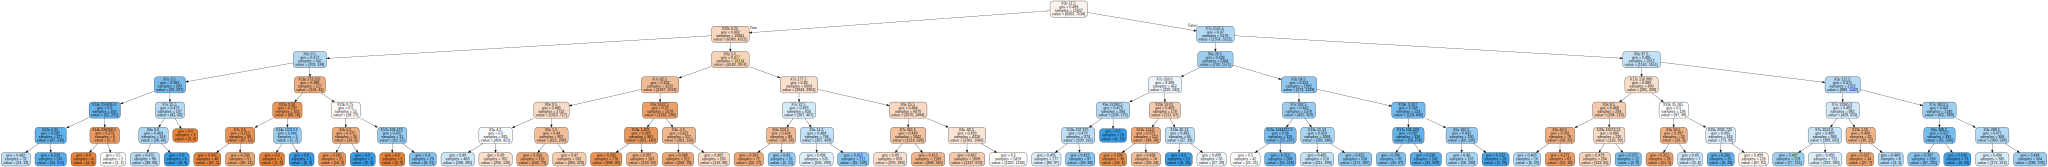

In [130]:
import graphviz 
#dot_data = tree.export_graphviz(dt_clf, out_file=None) 
#graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [111]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,New Active Cases,0.244
0,New Cases,0.173
7,Total Active Cases,0.172
20,Total Cases per Million,0.064
4,Total Cases,0.046
6,Total Recovered,0.041
19,New Cases per Million,0.039
22,Total Deaths per Million,0.030
2,New Recovered,0.028
23,Growth Factor of New Deaths,0.025


In [122]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 15))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)
accuracy

[0.6104166666666667,
 0.6183712121212122,
 0.6265151515151515,
 0.6329545454545454,
 0.6354166666666666,
 0.6365530303030303,
 0.6270833333333333,
 0.6231060606060606,
 0.6176136363636363,
 0.6217803030303031,
 0.6145833333333334,
 0.609469696969697,
 0.603030303030303,
 0.5984848484848485]

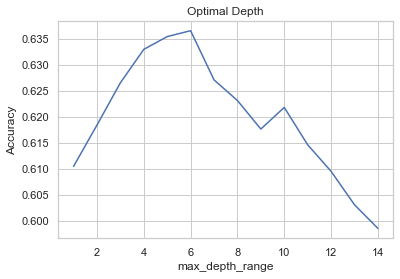

In [124]:
plt.plot(max_depth_range,accuracy)
plt.title('Optimal Depth')
plt.xlabel('max_depth_range')
plt.ylabel('Accuracy')
plt.show()

# Naive Bayes 
https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed

In [138]:
from sklearn.naive_bayes import GaussianNB

In [140]:
clf_nb = GaussianNB().fit(X_train, Y_train)

In [143]:
print(clf_nb.score(X_train, Y_train))

0.5312243480457157


In [144]:
print(clf_nb.score(X_test, Y_test))

0.5418560606060606


# SVM
https://towardsdatascience.com/svm-support-vector-machine-for-classification-710a009f6873

In [1]:
from sklearn.svm import SVR

In [2]:
svr = SVR(kernel = 'linear',C = 1000)

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn import svm
svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_test,Y_test)

y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
confusion_matrix(Y_test,y_test_pred)

array([[2769,   83],
       [2248,  180]], dtype=int64)

In [ ]:
accuracy_score(Y_test,y_test_pred)